<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Other%20Courses/Assignments/Programming_Assigment_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment

This notebook contains all the Programming Assignments for the Course 1 of this specialization. 

Course 1 -> Getting Started with TensorFlow 

## CNN Classifier for the MNIST dataset

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D


In [2]:
# Load and preprocess the data 

mnist_data = tf.keras.datasets.mnist
(train_images , train_labels) , (test_images , test_labels) = mnist_data.load_data()

def scale_mnist_data(train_images , test_images):
  train_images = train_images / 255.
  test_images = test_images / 255.

  return (train_images , test_images)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Getting our scaled data 
scaled_train_images , scaled_test_images = scale_mnist_data(train_images , test_images)


In [4]:
# Add a dummy channel dimension 

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

scaled_train_images.shape , scaled_test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# A function to create the model 
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = tf.keras.Sequential([
        Conv2D(64 , 3 , activation = 'relu' , input_shape = input_shape ,
              padding = 'SAME') , 
        MaxPooling2D(2), 
        Flatten(), 
        Dense(64 , activation = 'relu') , 
        Dense(63 , activation = 'relu'), 
        Dense(10 , activation = 'softmax')
    ])
    
    return model

In [6]:
# Using the function to our model 

model = get_model(scaled_train_images[0].shape)

# Summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dense_1 (Dense)              (None, 63)                4095      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                640       
Total params: 808,255
Trainable params: 808,255
Non-trainable params: 0
__________________________________________________

In [12]:
# Compiling our model 

def compile_model(model):
  return model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                       optimizer = tf.keras.optimizers.Adam() , 
                       metrics = ['accuracy'])

In [13]:
# Run the function to compile the model 
compile_model(model)

In [14]:
# Fit the model to the training data 

history = model.fit(scaled_train_images , train_labels , 
                    epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3382 - accuracy: 0.8989
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0557 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0225 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0163 - accuracy: 0.9943


Plotting the loss curves 

- Epoch vs Accuracy 
- Epoch vs Loss 

In [15]:
# Creating a dataframe of our model's history 
frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

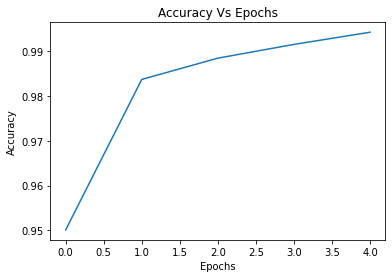

In [18]:
# Plotting Accuracy Vs Epochs 

acc_plot = frame.plot(y='accuracy' , 
                      title = 'Accuracy Vs Epochs' , 
                      legend= False)
acc_plot.set(xlabel = 'Epochs' , 
             ylabel = 'Accuracy')


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

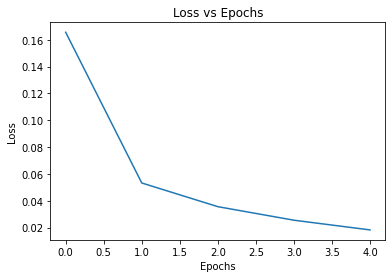

In [19]:
# Plotting Loss Vs Epochs plot 
loss_plot = frame.plot(y = 'loss' , title = 'Loss vs Epochs', 
                       legend = False)
loss_plot.set(xlabel = 'Epochs' , ylabel = 'Loss')

In [20]:
# Evaluating the model on test data 

test_loss , test_accuracy = model.evaluate(scaled_test_images , test_labels)


313/313 [==============================] - 3s 8ms/step - loss: 0.0456 - accuracy: 0.9870


In [21]:
# Printing the loss and accuracy on test data 
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.0455753430724144
Test Accuracy: 0.9869999885559082


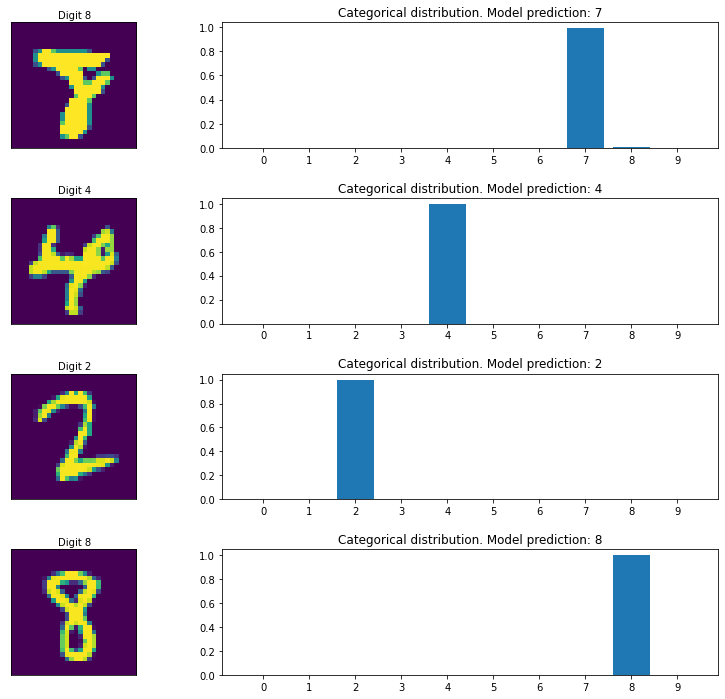

In [30]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

### Validation Sets
Validation set is used to measure how well our models performing outside the training set.

In [32]:
# Passing the validation split in model fit method 

history = model.fit(scaled_train_images , train_labels , validation_split= 0.2 , 
          epochs = 2)

Epoch 1/2
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0138 - val_accuracy: 0.9953
Epoch 2/2
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.0173 - val_accuracy: 0.9945


In [34]:
# Checking whats in our history 

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Now we could see two added components `val_loss` and `val_accuracy` which was calculated on the validation split.

In [ ]:
# Let's load a data and work on 